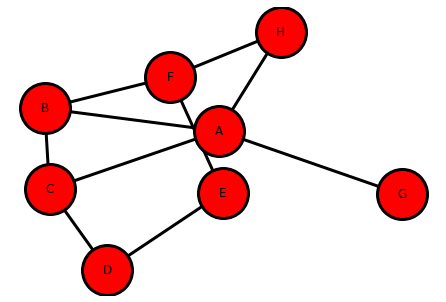

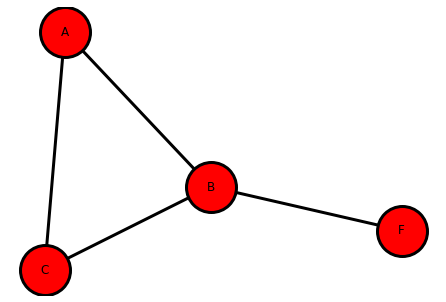

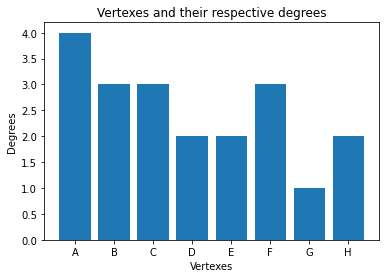

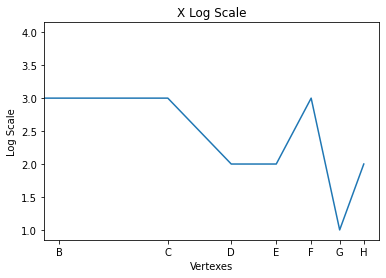

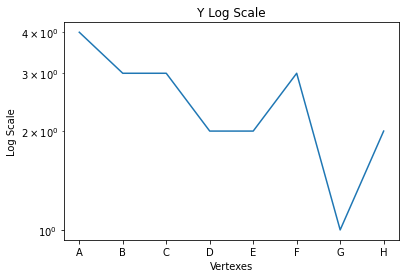

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections as col

from graph import Graph

class WeightedGraph(Graph):
    
    def __init__(self, V, E):
        self.G = {}
        
        for v in V:
            self.add_vertex(v)
        
        for u, v in E:
            self.add_w_edge(u, v)
            
    def add_w_edge(self, u, v):
        # add vertices in case they don't already exist
        self.add_vertex(u)
        self.add_vertex(v)

        # add undirected edge (u,v)
        self.G[u].add(v)
        self.G[v].add(u)

            
    def subgraph (self, letters, edges):  
                
        vertex = letters
        edge = []
        
        #Adds only points that should be in subgraph
        
        for values in edges:
            if (values[0] in letters) & (values[1] in letters):
                edge.append(values)
             
        #Creates graph 
        k =  WeightedGraph(vertex, edge)
        return k
    

    def viz(self):
        vizg = nx.Graph()
        vizg.add_nodes_from(self.get_vertices())
        vizg.add_edges_from(self.get_edges())
        options = {
        "font_size": 12,
        "node_size": 2500,
        "node_color": "red",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
        }
        pos = nx.spring_layout(vizg)
        nx.draw(vizg, pos, with_labels=True, **options)
        plt.show()
        
    def degree_distribution (self):
        
        #Creates list of degrees
        degree = []
        
        for v in self.G:
            degree.append(self.deg(v))
            
        return degree
        
    def subgraphCSV (self, letters):  

        vertex = []
        edge = []

        #Adds vertexes to graph that match the input
        for geneLetters in total:
            if geneLetters == letters:
                vertex.append(geneLetters)

        #Gets the edges of those vertexes

        edgeList = g.__getitem__(letters)

        #Designs/sets up graph
        for x, y in zip(vertex, edgeList):
            edge.append(tuple((x, y)))        

        #Creates graph 
        k =  WeightedGraph(vertex, edge)
        return k

def main():
    V = list("ABCDEFGH")
    E = [('A', 'B'), ('A', 'C'), ('A', 'G'), ('A', 'H'),
    ('B', 'C'), ('B', 'F'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'F'),
    ('H', 'F')]
    
    g = WeightedGraph(V, E)
    g.viz()
    
    subV = "A B C F"
    
    k = g.subgraph(subV.split(), E)
    k.viz()
    
    dist = g.degree_distribution()

    #Make bar chart 
    fig, ax = plt.subplots()
    
    ax.bar(V,dist)
    
    plt.title("Vertexes and their respective degrees")
    plt.xlabel("Vertexes")
    plt.ylabel("Degrees")
    
    plt.show()
    
    #Makes x log scale
    plt.xscale('log')
    plt.title("X Log Scale")
    plt.xlabel("Vertexes")
    plt.ylabel("Log Scale")
    plt.plot(V, dist)
    
    plt.show()
    
    #Makes y log scale
    plt.yscale('log')
    plt.title("Y Log Scale")
    plt.xlabel("Vertexes")
    plt.ylabel("Log Scale")
    plt.plot(V, dist)
    
    plt.show()
    
    
    
    

    
if __name__ == '__main__':
    main()

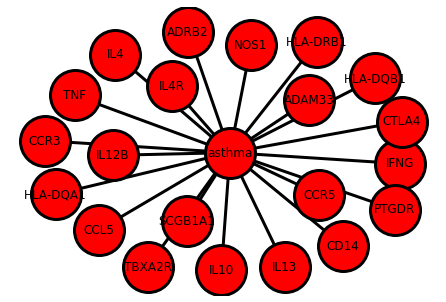

In [2]:
#Uploads and reads data to file

df = pd.read_csv("gad_data-1.csv")

df = df.drop(['chromosome', 'disease_class', 'num_negative', 'num_negative', 'num_unknown'], axis=1)

#Collects data from df
genes = []
disease = []
numPositive = []

total = []

for x in df['gene']:
    genes.append(x)
    
for y in df['disease']:
    disease.append(y)
    
for z in df['num_positive']:
    numPositive.append(str(z))
    
    
total = genes + disease
    
edge = []

node = "asthma"
    
#Creates the edges
for x, y in zip(genes, disease):
    edge.append(tuple((x, y)))
    
g =  WeightedGraph(total, edge)
k = g.subgraphCSV(node)
    
k.viz()




In [3]:
#Gets all the asthma linked genes

print(k.__getitem__(node))

{'SCGB1A1', 'IFNG', 'NOS1', 'TBXA2R', 'ADAM33', 'ADRB2', 'HLA-DQA1', 'CCR3', 'CCR5', 'IL4R', 'HLA-DQB1', 'CD14', 'TNF', 'HLA-DRB1', 'IL12B', 'CCL5', 'IL13', 'IL4', 'PTGDR', 'IL10', 'CTLA4'}


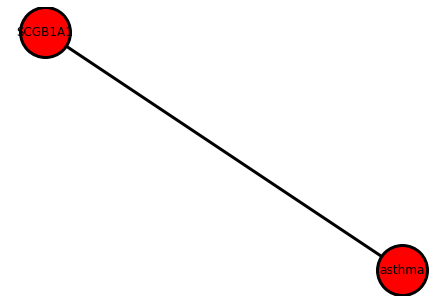

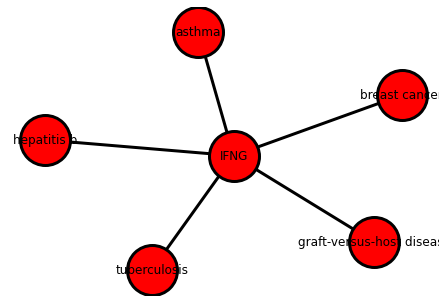

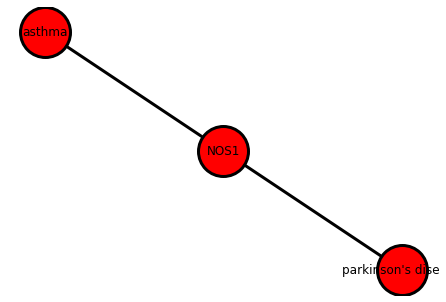

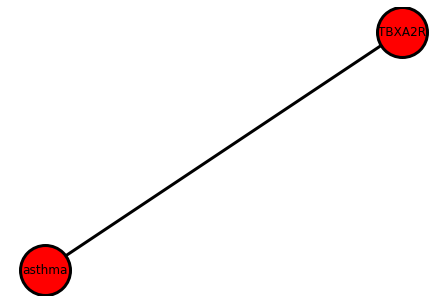

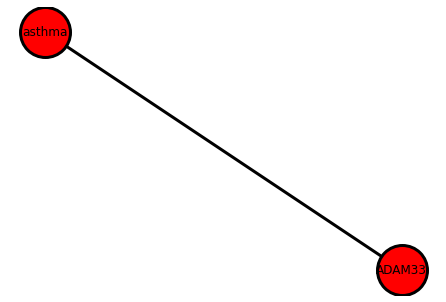

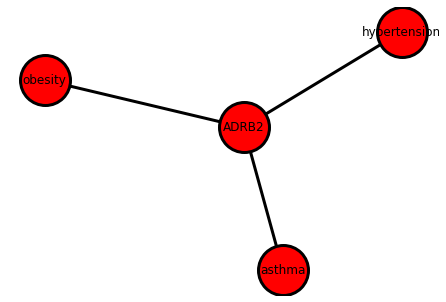

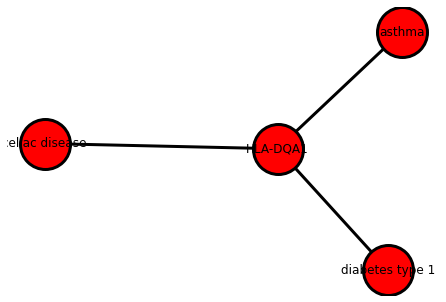

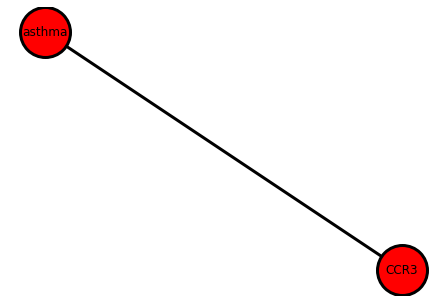

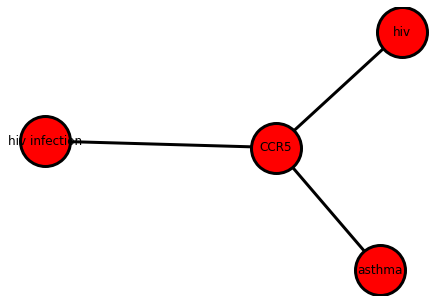

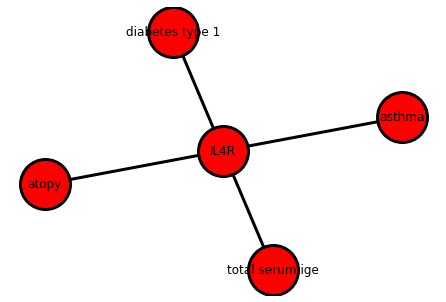

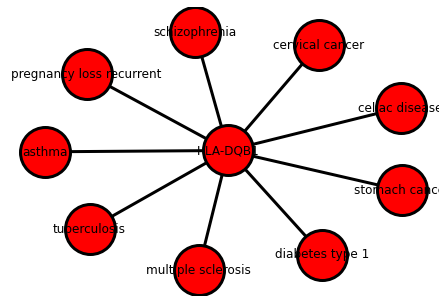

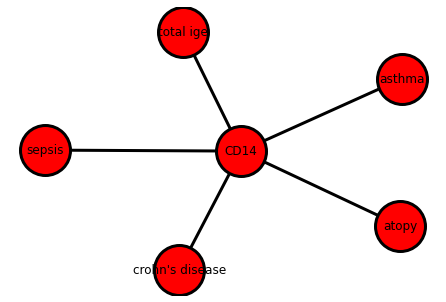

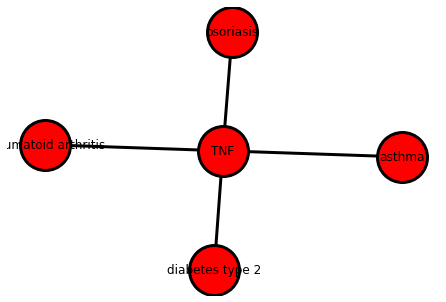

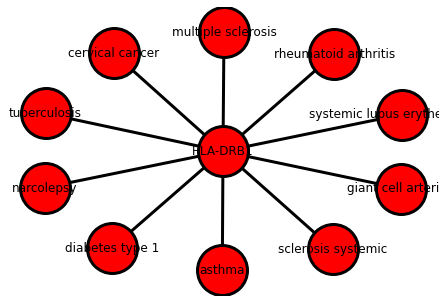

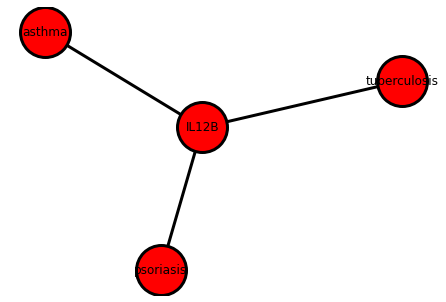

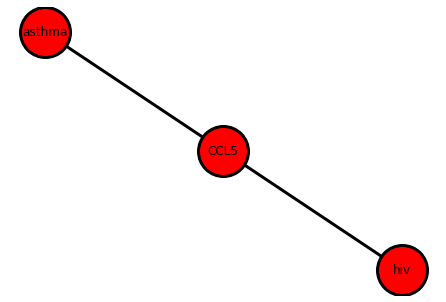

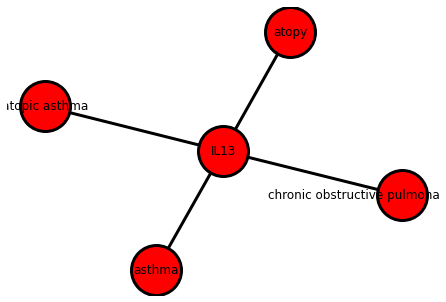

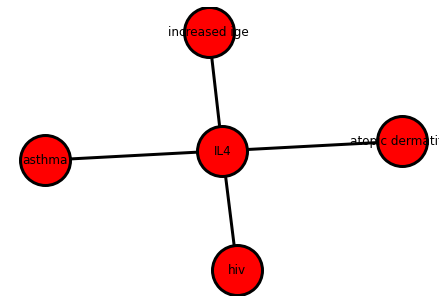

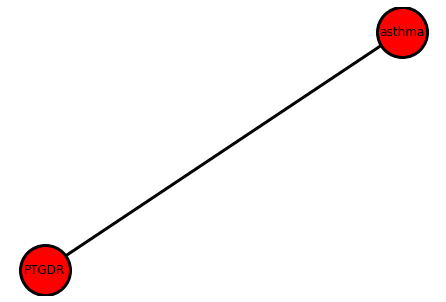

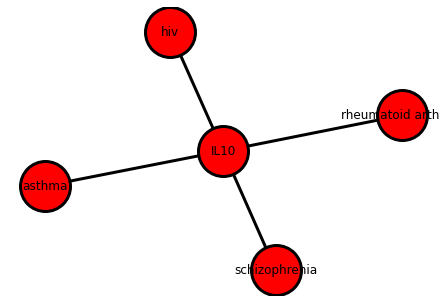

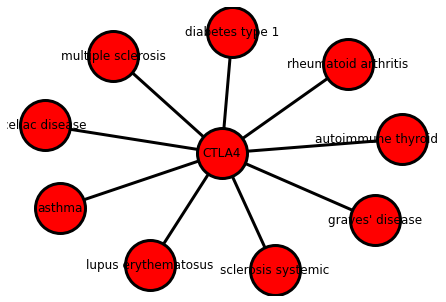

In [4]:
#Plots the asthma-linked genes other diseases 

for items in (k.__getitem__(node)):
    disease = g.subgraphCSV(items)
    disease.viz()